---
title: "Week 3: Acoustics"
subtitle: Introducing the physics of sound, room acoustics, and digital audio
authors: 
  - name: Alexander Refsum Jensenius
    affiliation: 
      - University of Oslo
description: "This document provides an introduction to the fundamentals of acoustics, covering the physics of sound, the behavior of sound in rooms and instruments, and the basics of digital audio. It includes explanations, visualizations, and practical exercises to help you understand how sound is produced, transmitted, and perceived in various contexts."
exports:
  - format: pdf
---

# Week 3: Acoustics

This week will explore the world of *acoustics*, which is a term that everyone knows, yet few people can define properly. We will go over the physics of sound, and look more closely at instrument acoustics and room acoustics before ending with an introduction to digital sound. 

## Introduction

### Defining acoustics

A short definition can be that acoustics is the study of sound and its properties. The term originates from the Greek word *ἀκουστικός (akoustikos)*, meaning "of or for hearing, ready to hear." According to the [ANSI/ASA S1.1-2013](https://webstore.ansi.org/standards/asa/ansiasas112013) standard, acoustics typically have two meanings:

1. The science of sound, encompassing its production, transmission, and effects, both biological and psychological ([acoustics](https://en.wikipedia.org/wiki/Acoustics))
2. The qualities of a room that determine its auditory characteristics (which is the sub-discipline of [room acoustics](https://en.wikipedia.org/wiki/Room_acoustics)).

We will begin by considering acoustics broadly and then some of its subdisciplines, room acoustics, instrument acoustics, and electroacoustics. However, the latter three are just some of the many subdisciplines of acoustics, as seen in this overview.

![Lindsay's Wheel of Acoustics](https://upload.wikimedia.org/wikipedia/commons/8/82/Lindsay%27s_Wheel_of_Acoustics.svg)

*Figure: Lindsay's Wheel of Acoustics, illustrating the interdisciplinary nature of acoustics ([source](https://commons.wikimedia.org/wiki/File:Lindsay%27s_Wheel_of_Acoustics.svg)).*

### Why is acoustics important for musicology, music psychology, and music technology?

Understanding acoustics is essential for musicology, music psychology, and music technology because it provides the scientific foundation for how sound is produced, transmitted, and perceived. In musicology, acoustics helps analyze the physical properties of musical instruments and performance spaces, informing historical and cultural studies of music. In music psychology, acoustics underpins research into how humans perceive pitch, timbre, loudness, and spatial attributes of sound, which are crucial for understanding musical cognition and emotion. In music technology, acoustics guides the design of audio equipment, recording techniques, and digital sound processing, enabling innovations in music production, reproduction, and analysis. Thus, acoustics bridges the gap between the physical world of sound and its artistic, perceptual, and technological dimensions.

### Cause and effect

At its core, acoustics is about describing the cause and effect of sound. If we consider this systemically, we can think of the following chain from cause to effect: 

```mermaid
graph LR
    A[Cause] --> B[Generating mechanism]
    B --> C[Propagation]
    C --> D[Reception]
    D --> E[Effect]
```

The generating and receiving mechanisms in acoustics are typically achieved through *transduction*, the process of converting energy from one form to another (e.g., mechanical to electrical, or vice versa). Sound first propagates through a medium (such as air, water, or solids), and is then transduced again at the point of reception, enabling further processing or perception. This chain of transduction and propagation is fundamental to how sound is produced, transmitted, and experienced.

For example, when a guitarist plucks a string (cause), the string vibrates and generates sound waves (generating mechanism). These sound waves travel through the air (propagation) and reach the human ear, where it is transduced and processed further. We will get back to the ear next week. 

The chain can be more complex. For example, the guitar sound can be picked up by a microphone, which converts the sound waves into electrical signals (reception/transduction). The electrical signals are then sent to a speaker, which converts them back into sound waves (effect/transduction), allowing the audience to hear the music.

## Nature of sound waves

### Vibrations

Vibrations are oscillatory motions of particles within a medium, which generate sound waves. These vibrations can be *periodic* (regular and repeating, as in musical notes) or *aperiodic* (irregular, as in noise). The nature of these vibrations determines the characteristics of the resulting sound, such as pitch and timbre. Vibrations are fundamental to the production and transmission of sound in acoustics. Let us begin by investigating some of the properties of sound waves.

```{note}
In the following, all the plots will be generated by Python code running inside the Jupyter Notebook that this text is written in. You can at any point in time check the source of the code, and even try yourself locally or in [Colab](https://colab.research.google.com/github/alexarje/sensing/blob/main/book/week3.ipynb). You don't need to understand the details of the code, but as you progress in your learning, it may help to be able to create such plots yourself.
```

In [2]:
# To make the rest of the code work, we need to load some Python libraries: 
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

ModuleNotFoundError: No module named 'scipy'

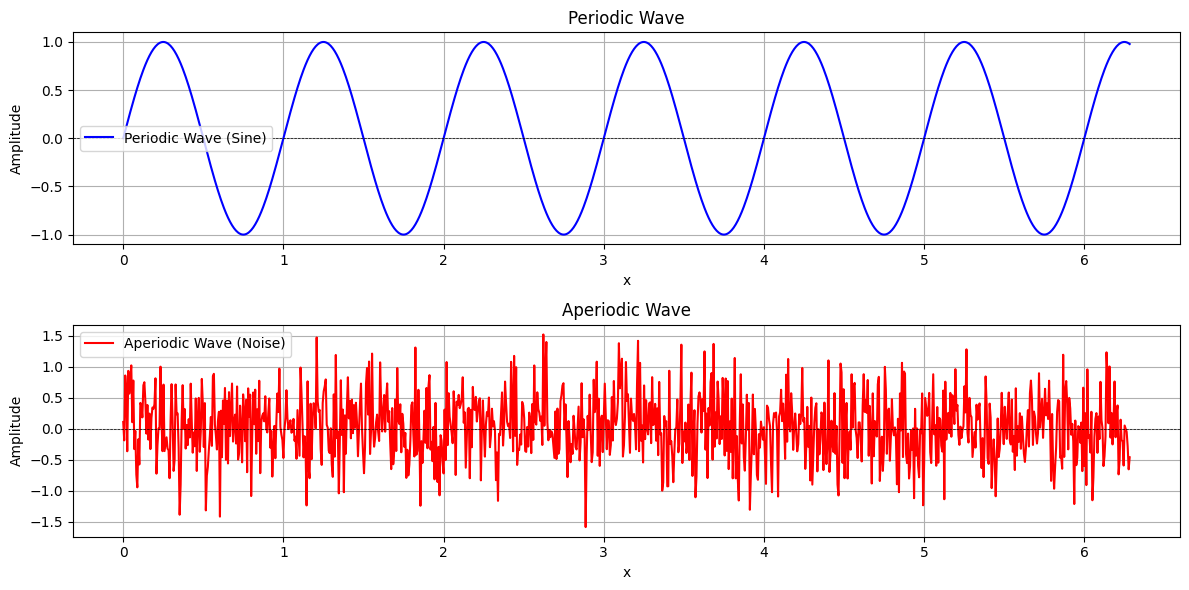

In [ ]:
# Define x
x = np.linspace(0, 2 * np.pi, 1000)

# Generate a periodic wave (sine wave)
periodic_wave = np.sin(2 * np.pi * x)

# Generate an aperiodic wave (random noise)
aperiodic_wave = np.random.normal(0, 0.5, len(x))

# Plot the periodic and aperiodic waves
plt.figure(figsize=(12, 6))

# Plot periodic wave
plt.subplot(2, 1, 1)
plt.plot(x, periodic_wave, label='Periodic Wave (Sine)', color='blue')
plt.title('Periodic Wave')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Plot aperiodic wave
plt.subplot(2, 1, 2)
plt.plot(x, aperiodic_wave, label='Aperiodic Wave (Noise)', color='red')
plt.title('Aperiodic Wave')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Longitudinal and Transverse Waves

Mechanical waves travel through a medium (such as air, water, or solids) by causing particles to vibrate. These waves are classified based on the direction of particle motion relative to the direction of wave propagation:

- **Longitudinal waves**: Particles oscillate parallel to the direction the wave travels. Sound waves in air are a common example.
- **Transverse waves**: Particles oscillate perpendicular to the direction of wave travel. Examples include waves on a string or surface water waves.

Understanding these wave types is fundamental to acoustics, as they determine how energy is transmitted through different materials.

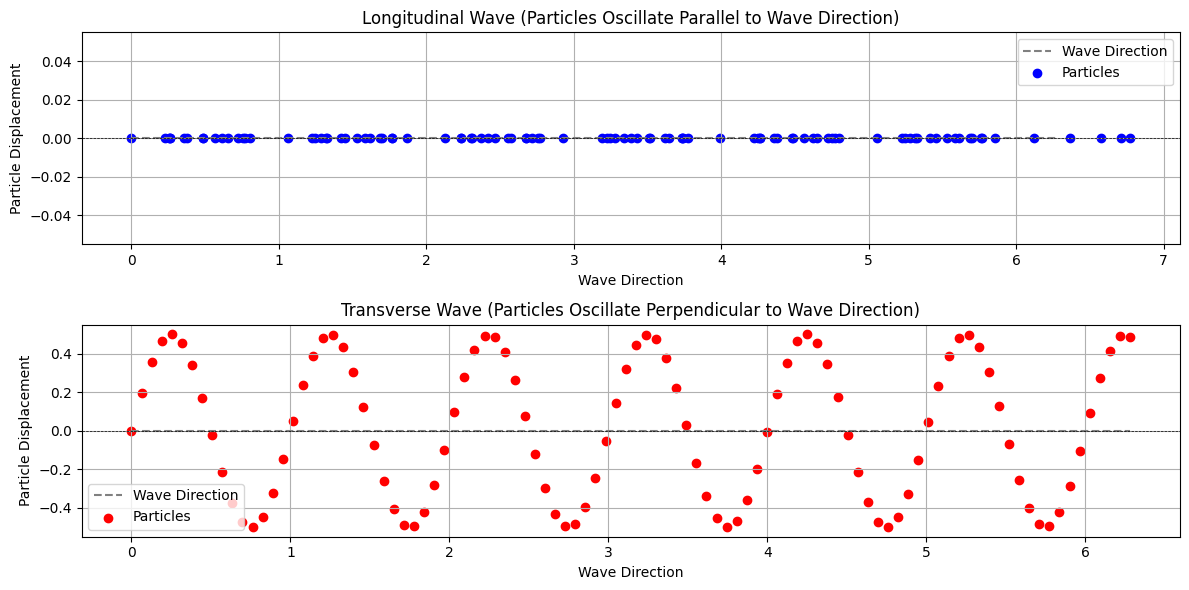

In [10]:
# Define parameters for the waves
x = np.linspace(0, 2 * np.pi, 100)
amplitude = 0.5
frequency = 1

# Generate waveforms
wave = np.sin(2 * np.pi * frequency * x)

# Create particle positions for longitudinal and transverse waves
longitudinal_x = x + amplitude * np.sin(2 * np.pi * frequency * x)
longitudinal_y = np.zeros_like(x)  # No vertical displacement

transverse_x = x  # No horizontal displacement
transverse_y = amplitude * np.sin(2 * np.pi * frequency * x)

# Create the figure
plt.figure(figsize=(12, 6))

# Plot longitudinal wave
plt.subplot(2, 1, 1)
plt.plot(x, np.zeros_like(x), '--', color='gray', label='Wave Direction')
plt.scatter(longitudinal_x, longitudinal_y, color='blue', label='Particles')
plt.title('Longitudinal Wave (Particles Oscillate Parallel to Wave Direction)')
plt.xlabel('Wave Direction')
plt.ylabel('Particle Displacement')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Plot transverse wave
plt.subplot(2, 1, 2)
plt.plot(x, np.zeros_like(x), '--', color='gray', label='Wave Direction')
plt.scatter(transverse_x, transverse_y, color='red', label='Particles')
plt.title('Transverse Wave (Particles Oscillate Perpendicular to Wave Direction)')
plt.xlabel('Wave Direction')
plt.ylabel('Particle Displacement')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Frequency

Frequency refers to the number of complete oscillations or cycles a sound wave undergoes per second, measured in Hertz (Hz). It determines the audible *pitch* of a sound: higher frequencies produce higher-pitched sounds, while lower frequencies result in lower-pitched sounds. Frequency is a fundamental property in acoustics, influencing how we perceive and analyze sound.

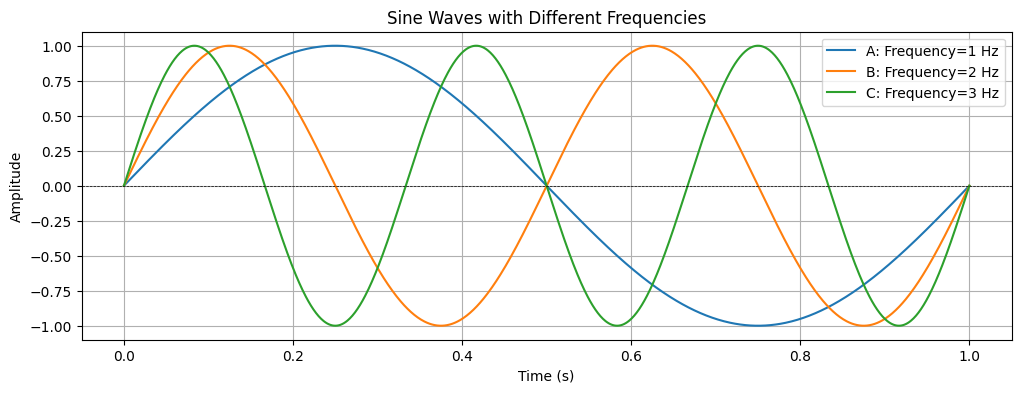

In [11]:
# Define parameters for the sine waves
time = np.linspace(0, 1, 1000)  # Time in seconds (0 to 1 second)
freq1, freq2, freq3 = 1, 2, 3  # Frequencies of the sine waves in Hz
wave1 = np.sin(2 * np.pi * freq1 * time)  # First sine wave
wave2 = np.sin(2 * np.pi * freq2 * time)  # Second sine wave
wave3 = np.sin(2 * np.pi * freq3 * time)  # Third sine wave

# Plot the sine waves
plt.figure(figsize=(12, 4))
plt.plot(time, wave1, label=f'A: Frequency={freq1} Hz')
plt.plot(time, wave2, label=f'B: Frequency={freq2} Hz')
plt.plot(time, wave3, label=f'C: Frequency={freq3} Hz')
plt.title('Sine Waves with Different Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

The frequency of a wave is closely related to its *period*, the time it takes for one complete cycle of a wave to occur. The period is measured in seconds (s) and frequency is the number of cycles that occur per second, measured in Hertz (Hz).

\[
f = \frac{1}{T}
\]
\[
T = \frac{1}{f}
\]

For example, if a wave has a period of 0.01 seconds, its frequency is \( f = 1 / 0.01 = 100 \) Hz. If the frequency is 50 Hz, the period is \( T = 1 / 50 = 0.02 \) seconds.

### Amplitude

A sound wave's amplitude defines how "loud" it is. More precisely, amplitude is the maximum displacement of particles in the medium from their rest position as the wave passes through. In a graphical representation, such as a sine wave, amplitude corresponds to the peak value above and below the center line (zero).

Higher amplitude means greater energy in the wave, resulting in a louder sound. Lower amplitude produces a quieter sound. Amplitude is typically measured in units such as meters (for displacement), pascals (for pressure), or volts (for electrical signals).

For example, in the plot below, each sine wave has a specific amplitude. The peaks and troughs of the wave show the maximum and minimum values, illustrating how amplitude determines the loudness of the sound.

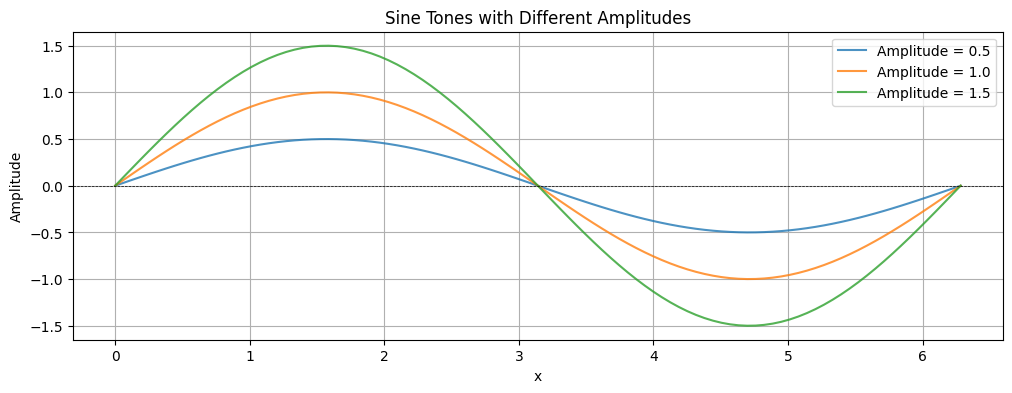

In [12]:
# Define amplitudes for the sine tones
amplitude1 = 0.5
amplitude2 = 1.0
amplitude3 = 1.5

# Generate the sine tones
sine1 = amplitude1 * np.sin(x)
sine2 = amplitude2 * np.sin(x)
sine3 = amplitude3 * np.sin(x)

# Plot the sine tones
plt.figure(figsize=(12, 4))
plt.plot(x, sine1, label='Amplitude = 0.5', alpha=0.8)
plt.plot(x, sine2, label='Amplitude = 1.0', alpha=0.8)
plt.plot(x, sine3, label='Amplitude = 1.5', alpha=0.8)
plt.title('Sine Tones with Different Amplitudes')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Sound Pressure Level (SPL)

[Sound Pressure Level](https://en.wikipedia.org/wiki/Sound_pressure#Sound_pressure_level) (SPL) is a measure of the pressure variation caused by a sound wave. It is used in various fields, such as acoustics, audio engineering, and environmental noise monitoring, to assess sound levels and ensure compliance with safety standards. Understanding SPL is crucial for analyzing how sound behaves in different environments and its impact on human hearing.

SPL is expressed in [decibels](https://en.wikipedia.org/wiki/Decibel) (dB), which is a *[logarithmic](https://en.wikipedia.org/wiki/Logarithmic_scale)* unit used to express the ratio of two values. In a logarithmic scale, each step on the scale represents a multiplication rather than a simple addition. For example, an increase of 10 dB corresponds to a tenfold increase in sound intensity, while an increase of 20 dB means a hundredfold increase. This allows us to represent very large ranges of sound pressure in a compact and manageable way, since human hearing also perceives loudness logarithmically rather than linearly. 

The formula for SPL in decibels is:

<span style="display:block; text-align:center;">
    <strong>SPL</strong> = 20&nbsp;log<sub>10</sub>(p / p<sub>0</sub>)
</span>

where <em>p</em> is the measured sound pressure and <em>p<sub>0</sub></em> is the reference sound pressure (typically 20&nbsp;μPa in air).

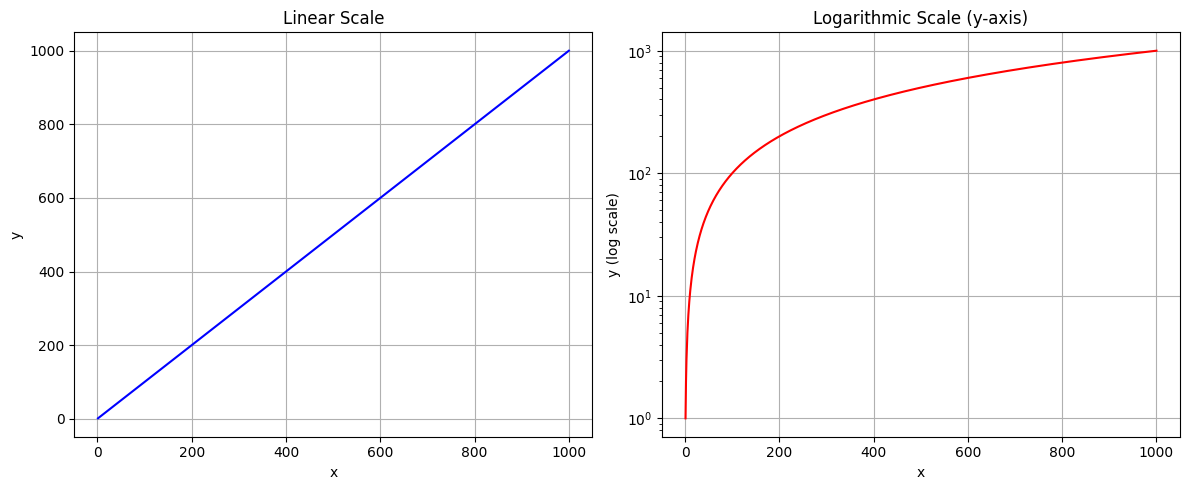

In [13]:
# Plot illustrating regular (linear) vs logarithmic scale

x = np.linspace(1, 1000, 1000)
y = x  # Linear relationship

plt.figure(figsize=(12, 5))

# Linear scale plot
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue')
plt.title('Linear Scale')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Logarithmic scale plot
plt.subplot(1, 2, 2)
plt.plot(x, y, color='red')
plt.yscale('log')
plt.title('Logarithmic Scale (y-axis)')
plt.xlabel('x')
plt.ylabel('y (log scale)')
plt.grid()

plt.tight_layout()
plt.show()

What is important to know is that a 10 dB increase in SPL is generally perceived as about twice as loud by the human ear. This is because human hearing responds logarithmically: a 10 dB rise means the sound pressure increases by a factor of about 3.16, but our perception of loudness roughly doubles.

The *3 dB rule* states that if you add a second identical sound source, the SPL increases by about 3 dB, doubling the energy but only slightly increasing perceived loudness. For example, if a single speaker produces 70 dB SPL at a certain point, adding a second identical speaker playing the same signal at the same location will increase the SPL to approximately 73 dB. This is because the sound pressure doubles, resulting in a 3 dB increase, but the perceived loudness is only slightly greater, not doubled. Similarly, two 60 dB sound sources will have a combined SPL of 63 dB. 

In addition, you need to know about the *Inverse-Square Law*, which states that when the distance from a sound source doubles, the sound pressure drops to one-fourth, resulting in a 6 dB reduction in SPL. This explains why sounds become much quieter as you move further away from the source.

![Inverse Square Law](https://upload.wikimedia.org/wikipedia/commons/d/da/Inverse_square_law_mk.svg)

*Figure: Illustration of the Inverse-Square Law, showing how sound pressure decreases with distance ([Wikipedia](https://commons.wikimedia.org/wiki/File:Inverse_square_law_mk.svg)).*

### Phase

Describes the position of a point within a wave cycle, measured in degrees or radians. Phase differences between waves can lead to constructive or destructive interference.

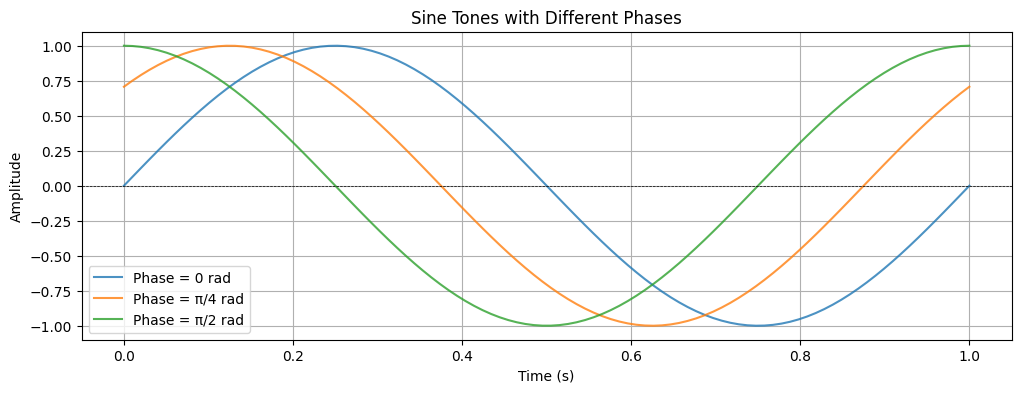

In [16]:
# Define the amplitude and frequency for the sine tones
x = np.linspace(0, 2 * np.pi, 100)
amplitude = 1
frequency = 1  # Frequency in Hz

# Define the phases for the three sine tones
phase1 = 0  # 0 radians
phase2 = np.pi / 4  # 45 degrees in radians
phase3 = np.pi / 2  # 90 degrees in radians

# Convert x to time in seconds
time_in_seconds = x / (2 * np.pi * frequency)

# Generate the sine tones
sine1 = amplitude * np.sin(2 * np.pi * frequency * time_in_seconds + phase1)
sine2 = amplitude * np.sin(2 * np.pi * frequency * time_in_seconds + phase2)
sine3 = amplitude * np.sin(2 * np.pi * frequency * time_in_seconds + phase3)

# Plot the sine tones
plt.figure(figsize=(12, 4))
plt.plot(time_in_seconds, sine1, label='Phase = 0 rad', alpha=0.8)
plt.plot(time_in_seconds, sine2, label='Phase = π/4 rad', alpha=0.8)
plt.plot(time_in_seconds, sine3, label='Phase = π/2 rad', alpha=0.8)
plt.title('Sine Tones with Different Phases')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

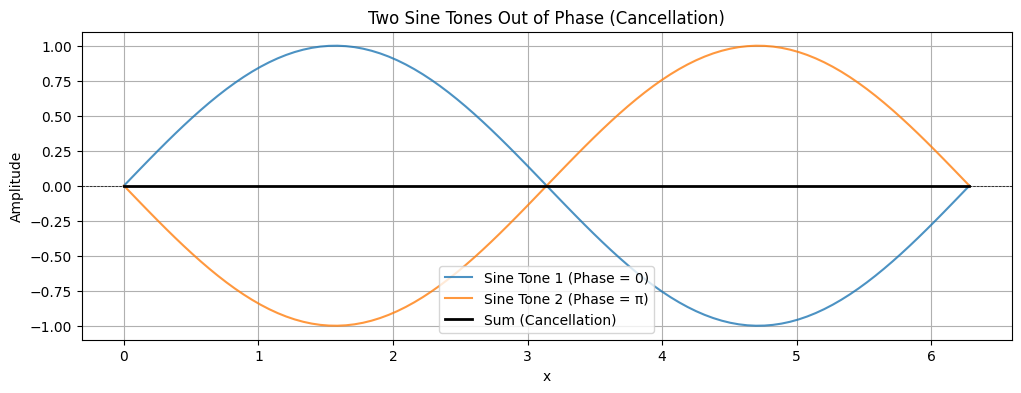

In [17]:
# Define amplitude and frequency for the sine tones
amplitude = 1
frequency = 1  # Frequency in Hz

# Use x from previous cells
# Define two sine tones with opposite phases (0 and pi)
sine1 = amplitude * np.sin(x)
sine2 = amplitude * np.sin(x + np.pi)  # 180 degrees out of phase

# Sum of the two sine tones
sum_wave = sine1 + sine2

# Plot the two sine tones and their sum
plt.figure(figsize=(12, 4))
plt.plot(x, sine1, label='Sine Tone 1 (Phase = 0)', alpha=0.8)
plt.plot(x, sine2, label='Sine Tone 2 (Phase = π)', alpha=0.8)
plt.plot(x, sum_wave, label='Sum (Cancellation)', color='black', linewidth=2)
plt.title('Two Sine Tones Out of Phase (Cancellation)')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

```{exercise}
:label: Phase in production

Have you tried swapping the phase in a music track? Try [this phase cancellation](https://l2ork.music.vt.edu:3000/?url=VTWaves/Phase-Cancellation-Emscripten.pd) web experiment. 
```

### Beating waves

When two sound waves of slightly different frequencies are played together, they interfere with each other. This interference causes the amplitude of the combined wave to fluctuate up and down in a regular pattern, called a *beat*. The *[beat frequency](https://en.wikipedia.org/wiki/Beat_(acoustics))* is equal to the difference between the two original frequencies. For example, two tones with frequencies 440 Hz and 441 Hz will cause a beat frequency of 1 Hz. You hear this as the sound getting louder and softer at this beat frequency.

Mathematically, if you add two sine waves with close frequencies, the result is a wave whose amplitude varies slowly, creating the "beating" effect. This is commonly heard when tuning musical instruments or when two notes are almost, but not quite, in tune.

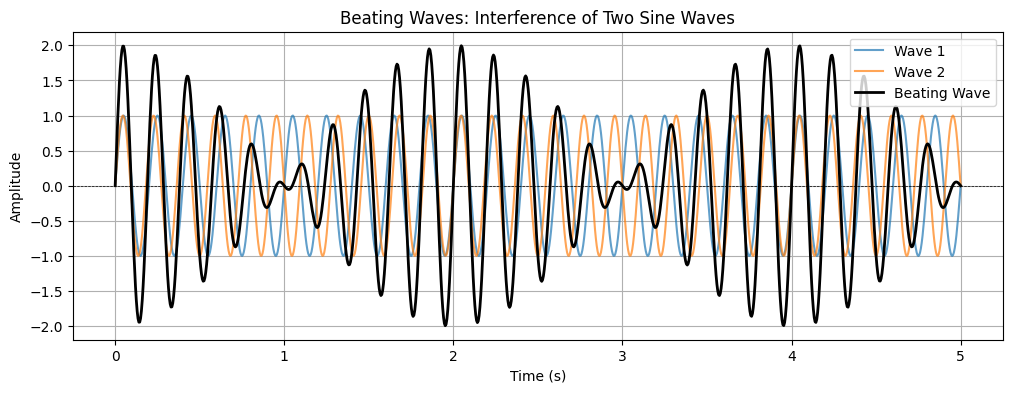

In [18]:
# Define parameters for the two sine waves
frequency1 = 5  # Frequency of the first wave in Hz
frequency2 = 5.5  # Frequency of the second wave in Hz
amplitude = 1  # Amplitude of the waves
time = np.linspace(0, 5, 1000)  # Time array from 0 to 5 seconds

# Generate the two sine waves
wave1 = amplitude * np.sin(2 * np.pi * frequency1 * time)
wave2 = amplitude * np.sin(2 * np.pi * frequency2 * time)

# Generate the resulting wave (superposition)
beating_wave = wave1 + wave2

# Plot the individual waves and the resulting wave
plt.figure(figsize=(12, 4))
plt.plot(time, wave1, label='Wave 1', alpha=0.7)
plt.plot(time, wave2, label='Wave 2', alpha=0.7)
plt.plot(time, beating_wave, label='Beating Wave', color='black', linewidth=2)
plt.title('Beating Waves: Interference of Two Sine Waves')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

```{exercise}
:label: Sine tones

Try out making sine tones in [Glicol](https://glicol.org/tour#basicconnection). Change the amplitude and frequency to hear how they are affecting what you hear. Try adding an extra sine tone with a different frequency create a beat frequency.
```

### Complex waves

A *complex wave* is a sound wave that consists of multiple frequencies combined together, rather than a single pure tone. Most sounds we hear in everyday life, such as musical notes, speech, or environmental noises, are complex waves.

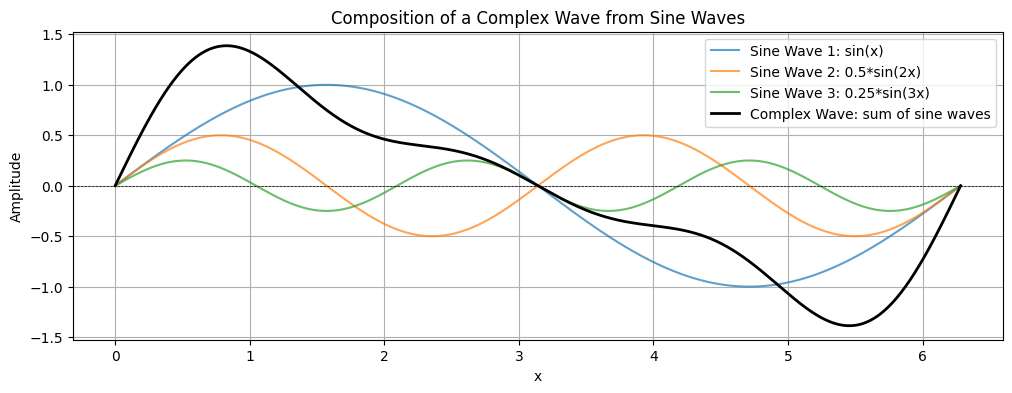

In [19]:
# Define parameters for the sine waves
x = np.linspace(0, 2 * np.pi, 1000)
wave1 = np.sin(x)  # First sine wave
wave2 = 0.5 * np.sin(2 * x)  # Second sine wave with half amplitude and double frequency
wave3 = 0.25 * np.sin(3 * x)  # Third sine wave with quarter amplitude and triple frequency

# Sum of the sine waves (complex wave)
complex_wave = wave1 + wave2 + wave3

# Plot the individual sine waves and the complex wave
plt.figure(figsize=(12, 4))
plt.plot(x, wave1, label='Sine Wave 1: sin(x)', alpha=0.7)
plt.plot(x, wave2, label='Sine Wave 2: 0.5*sin(2x)', alpha=0.7)
plt.plot(x, wave3, label='Sine Wave 3: 0.25*sin(3x)', alpha=0.7)
plt.plot(x, complex_wave, label='Complex Wave: sum of sine waves', color='black', linewidth=2)
plt.title('Composition of a Complex Wave from Sine Waves')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Time vs Frequency Domain

Sound can be represented visually in two fundamentally different ways:

- **Time domain**: A "waveform display" shows how the amplitude of a signal (such as a sound wave) changes over time This view helps us understand the shape, duration, and dynamics of the signal.

- **Frequency domain**: A *spectrum* plot or *spectrogram* shows how much of the signal lies within each frequency band. The frequency domain representation is typically obtained using the Fourier transform. This view is useful for analyzing pitch, timbre, and spectral content.

### The Fourier Transform

Any complex wave can be represented as the sum of simpler sinusoidal waves with different frequencies, amplitudes, and phases, a process called *Fourier analysis* ([Wikipedia](https://en.wikipedia.org/wiki/Fourier_analysis)). This technique was discovered by the French mathematician [Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier) (1768–1830), laying the foundation for modern signal processing and harmonic analysis. 

BelwThis decomposition is fundamental in acoustics, music technology, and audio engineering, as it allows us to analyze, synthesize, and manipulate sounds in both the time and frequency domains.

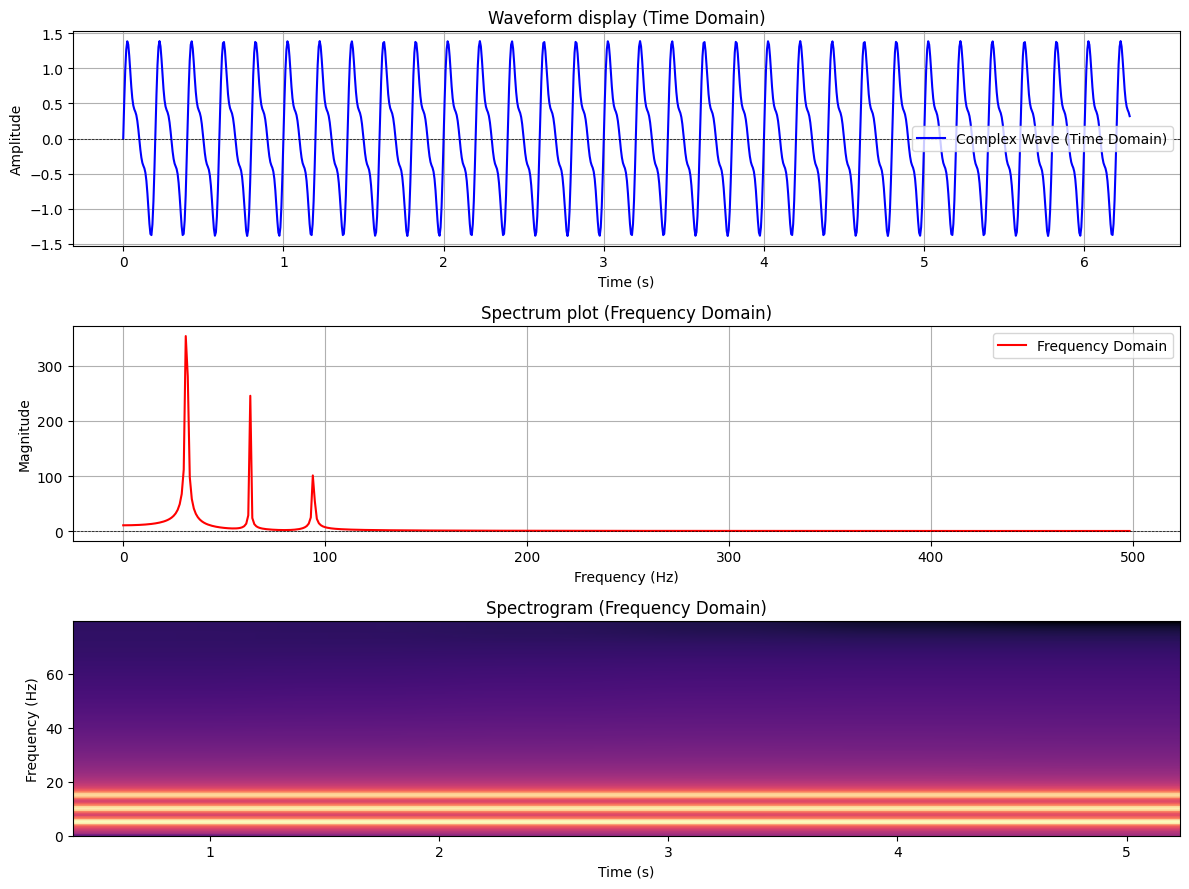

In [14]:
# Define parameters for the complex wave
frequency1 = 5  # Frequency of the first wave in Hz
frequency2 = 10  # Frequency of the second wave in Hz
frequency3 = 15  # Frequency of the third wave in Hz
amplitude1 = 1
amplitude2 = 0.5
amplitude3 = 0.25

# Generate the complex wave as a sum of three sine waves
wave1 = amplitude1 * np.sin(2 * np.pi * frequency1 * x)
wave2 = amplitude2 * np.sin(2 * np.pi * frequency2 * x)
wave3 = amplitude3 * np.sin(2 * np.pi * frequency3 * x)
complex_wave = wave1 + wave2 + wave3

# Compute the Fourier Transform of the complex wave
N = len(complex_wave)
T = (x[1] - x[0]) / (2 * np.pi)
frequencies = fftfreq(N, T)[:N // 2]
fft_values = fft(complex_wave)[:N // 2]

# Plot time domain, frequency domain, and spectrogram
plt.figure(figsize=(12, 9))

# Time domain plot
plt.subplot(3, 1, 1)
plt.plot(x, complex_wave, label='Complex Wave (Time Domain)', color='blue')
plt.title('Waveform display (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Frequency domain plot
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(fft_values), label='Frequency Domain', color='red')
plt.title('Spectrum plot (Frequency Domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Spectrogram plot
plt.subplot(3, 1, 3)
plt.specgram(complex_wave, NFFT=256, Fs=1/(x[1]-x[0]), noverlap=128, cmap='magma')
plt.title('Spectrogram (Frequency Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

Note how the spectrum plot displays frequency on the X axis and magnitude on the Y axis, while the spectrogram shows time on the X axis and frequency on the Y axis. The spectrum provides an overview of the frequency content averaged over the entire signal. The spectrogram reveals how the frequency content changes over time, showing the temporal evolution.

To better visualize their relationship, you can plot the spectrum rotated 90 degrees, aligning its frequency axis with the spectrogram’s frequency axis. This highlights the difference: the spectrum summarizes the whole signal, while the spectrogram shows its development over time.

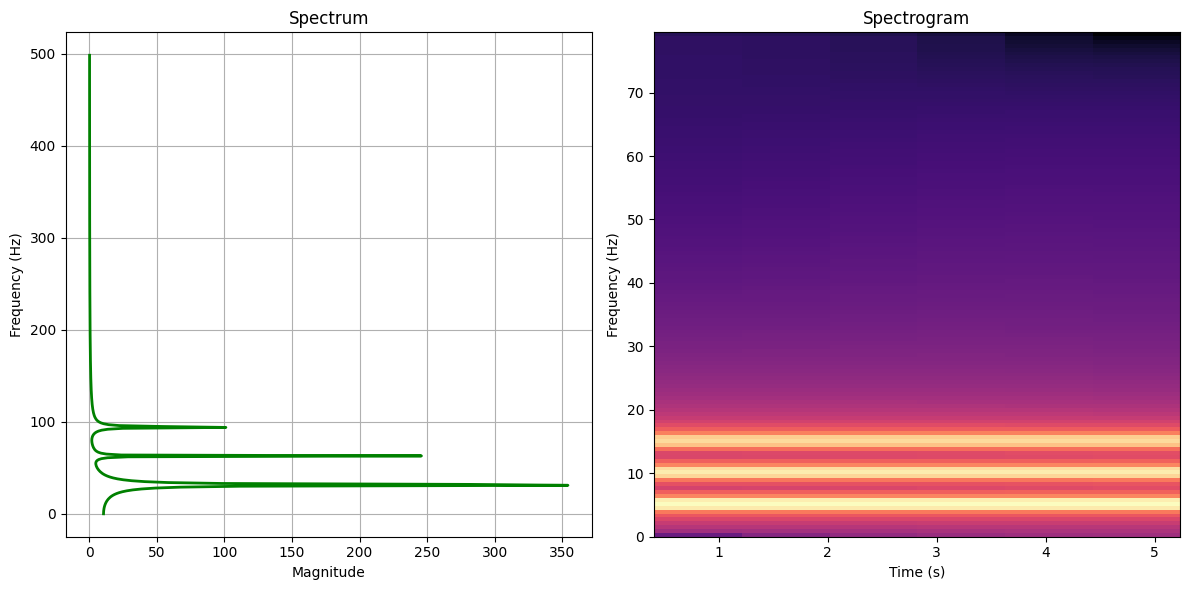

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left: Spectrum turned 90 degrees
axes[0].plot(np.abs(fft_values), frequencies, color='green', linewidth=2)
axes[0].set_title('Spectrum')
axes[0].set_ylabel('Frequency (Hz)')
axes[0].set_xlabel('Magnitude')
axes[0].grid()

# Right: Spectrogram
axes[1].specgram(complex_wave, NFFT=256, Fs=1/(x[1]-x[0]), noverlap=128, cmap='magma')
axes[1].set_title('Spectrogram')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

```{note}
You may come across the term *sonogram* in the literature. It is essentially a spectrogram of sound signals. For sound and music, they are used interchangeably. However, spectrograms are more general, and can be used to decompose also other types of complex time-based signals.
```

### Noise

Noise refers to random or unpredictable fluctuations in sound, often lacking a clear pitch or musical quality. In acoustics and audio engineering, different types of noise are characterized by their frequency content and how energy is distributed across the spectrum. Common types of noise include:

- **White noise**: Contains all frequencies at equal intensity, resulting in a "hissing" sound similar to static from a radio or TV. It is often used for sound masking and audio testing because of its uniform frequency distribution.
- **Pink noise**: Has equal energy per octave, meaning its power decreases as frequency increases. This gives it a deeper sound, similar to rainfall or wind, and makes it useful for audio calibration and sleep aids.
- **Brownian noise (Red noise)**: Emphasizes even lower frequencies than pink noise, producing a deep rumble or distant thunder-like sound. It is generated by random walk processes and is sometimes called "red noise."
- **Blue noise**: Contains more energy at higher frequencies, resulting in a brighter, sharper sound. Blue noise is rare in nature but is used in dithering applications in digital audio and image processing.
- **Grey noise**: Adjusted so that all frequencies are perceived as equally loud to the human ear, based on psychoacoustic principles. It is used in research and testing to account for human hearing sensitivity.

The above noise types are "constant" in the sense that they have the same characteristics. One can also talk about different types of "impulse noise", based on sudden, short bursts of sound, such as clicks, pops, or bangs. Impulse noise is common in environments with machinery, gunshots, or electrical discharges.

These noise types are used in audio testing, sound masking, electronic music, and various scientific applications. Understanding the characteristics of each type helps in designing systems for noise reduction, audio analysis, and environmental sound studies.

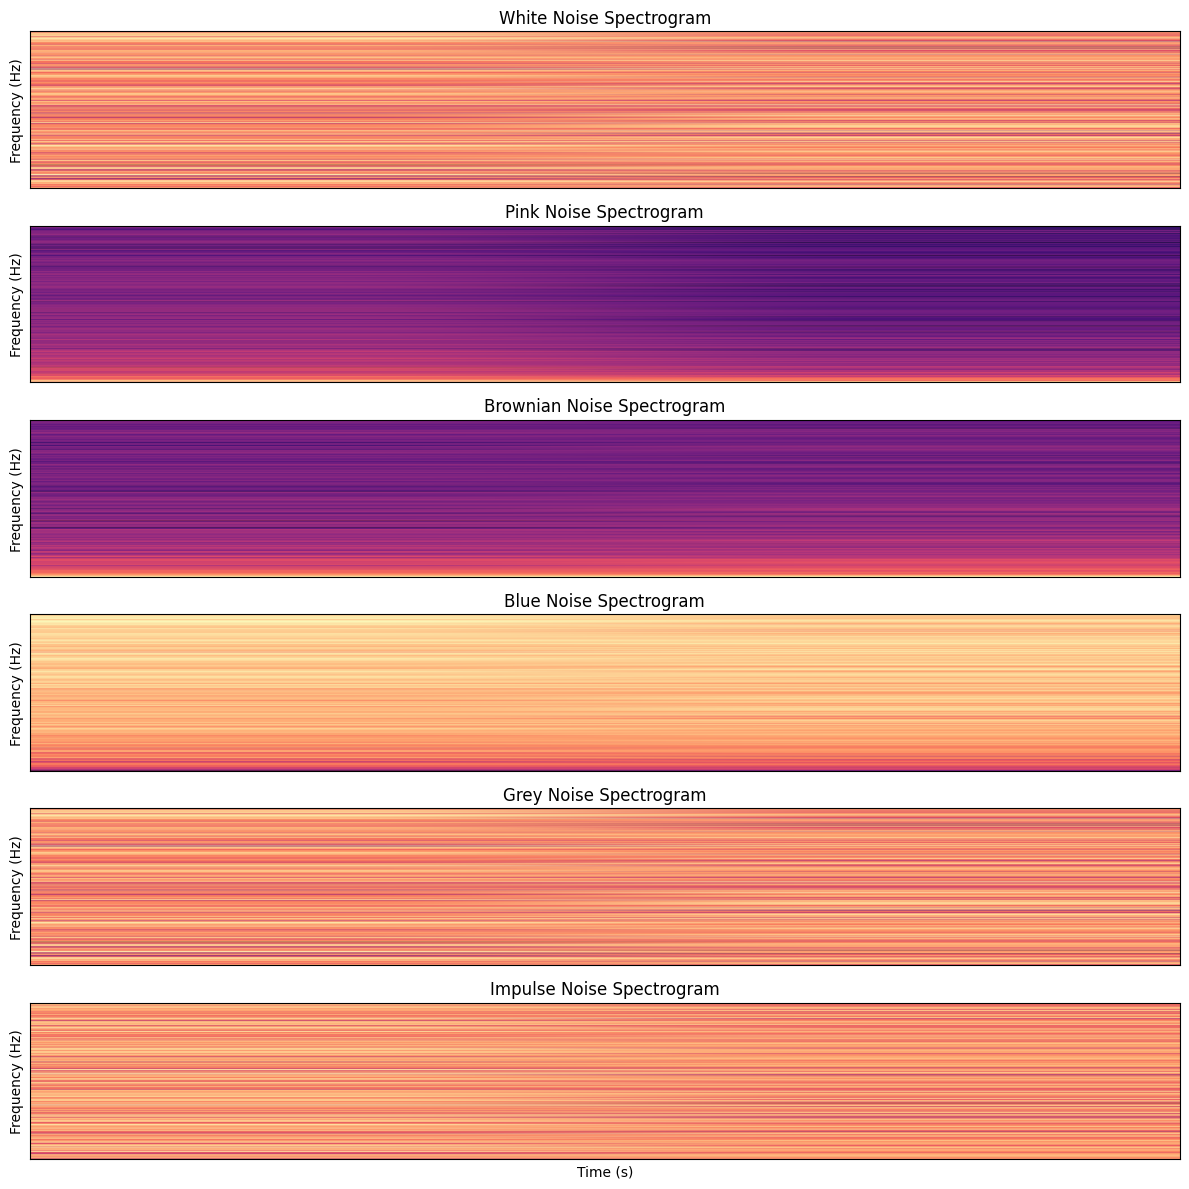

In [20]:
# Define parameters
sampling_rate = 1000  # Hz
duration = 2  # seconds
N = sampling_rate * duration
t = np.linspace(0, duration, N, endpoint=False)

# Generate noises
white_noise = np.random.normal(0, 1, N)

# Pink noise (approximate using Voss-McCartney algorithm)
def pink_noise(N):
    n_rows = 16
    n_cols = N
    array = np.random.randn(n_rows, n_cols)
    array = np.cumsum(array, axis=1)
    array = array / np.arange(1, n_cols + 1)
    return np.sum(array, axis=0)

pink_noise = pink_noise(N)

# Brownian noise (integrated white noise)
brownian_noise = np.cumsum(np.random.normal(0, 1, N))
brownian_noise /= np.max(np.abs(brownian_noise))

# Blue noise (differentiated white noise)
blue_noise = np.diff(white_noise, prepend=0)
blue_noise /= np.max(np.abs(blue_noise))

# Grey noise (white noise shaped by equal loudness curve, here just normalized white noise)
grey_noise = white_noise / np.max(np.abs(white_noise))

# Impulse noise (random sparse spikes)
impulse_noise = np.zeros(N)
impulse_indices = np.random.choice(N, size=int(N * 0.01), replace=False)
impulse_noise[impulse_indices] = np.random.choice([-1, 1], size=len(impulse_indices))

# List of noises
noises = [
    ("White", white_noise),
    ("Pink", pink_noise),
    ("Brownian", brownian_noise),
    ("Blue", blue_noise),
    ("Grey", grey_noise),
    ("Impulse", impulse_noise)
]

# Plot spectrograms
plt.figure(figsize=(12, 12))
for i, (name, noise) in enumerate(noises, 1):
    plt.subplot(6, 1, i)
    plt.specgram(noise, Fs=sampling_rate, NFFT=1024, noverlap=512, cmap='magma')
    plt.title(f'{name} Noise Spectrogram')
    plt.ylabel('Frequency (Hz)')
    plt.xticks([])
    plt.yticks([])
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

```{exercise}
:label: Make spectrograms in Sonic Visualiser

Download and install [Sonic Visualiser](https://www.sonicvisualiser.org/), a free tool for visualizing and analyzing audio files. Open a sound file (such as a recording or sample) and experiment with creating spectrograms:

- Load your audio file into Sonic Visualiser.
- Add a new spectrogram layer (choose "Layer" → "Add Spectrogram").
- Adjust the spectrogram settings (window size, color map, etc.) to explore how they affect the visualization.
- Try zooming in and out to examine different time and frequency regions.

How does the spectrogram help you understand the frequency content and changes over time in your audio? Compare the visual patterns for different sounds (speech, music, noise).
```

## Sound propagation

Sound propagation refers to how sound waves travel through different environments and interact with materials. 

### Medium of Propagation

Sound needs a medium, such as air, water, or solids, to travel. The particles in these media vibrate and transmit energy from one place to another. The speed and efficiency of sound propagation depend on the medium’s properties, especially density and elasticity. Generally, sound travels faster in materials that are more elastic and have closely packed particles.

Here are some examples of the [speed of sound](https://en.wikipedia.org/wiki/Speed_of_sound) in different media:

| Medium   | Speed (m/s) |
|----------|-------------|
| Air      | 343         |
| Helium   | 965         |
| Water    | 1481        |
| Glass    | 4540        |
| Iron     | 5120        |
| Diamond  | 12000       |

Sound moves fastest in solids (like iron or diamond) because their particles are tightly packed and transmit vibrations efficiently. For example, you can hear a distant train by placing your ear on the rail, as sound travels much faster through metal than air.

Temperature, humidity, and altitude also affect the speed of sound. Warmer air or higher humidity generally increases the speed, while higher altitude (lower air density) decreases it.

### Reflection, Refraction, Diffraction, and Absorption

There are four physics concepts that are important for understanding the behavior of sound in general, but also in both rooms and instruments: 

- **Reflection**: Sound waves bounce off surfaces, creating echoes and affecting acoustics. In a concert hall, hard walls and ceilings reflect sound, producing reverberation and echoes. Inside a guitar, sound waves reflect off the wooden body, reinforcing certain frequencies and contributing to the instrument’s tone.

- **Refraction**: When sound moves between media (e.g., air to water), its speed changes, causing the wave to bend Temperature gradients in a room can cause sound waves to bend, affecting how sound travels from the stage to the audience. In wind instruments, sound waves refract as they move through air of varying temperature or humidity inside the instrument, subtly changing pitch and timbre.

- **Diffraction**: Sound waves bend around obstacles and spread out after passing through openings. Sound diffracts around furniture or pillars, allowing you to hear someone speaking even if they are not in direct line of sight. The sound from a violin’s f-holes diffracts, helping project the instrument’s sound in all directions.

- **Absorption**: Materials absorb sound energy, reducing its intensity. Carpets, curtains, and acoustic panels absorb sound, reducing echoes and making rooms quieter. The type of wood or material used in a drum absorbs some sound energy, affecting the instrument’s resonance and sustain.

These principles shape how we experience sound in different environments, from open fields to concert halls, and influence the design and performance of musical instruments.

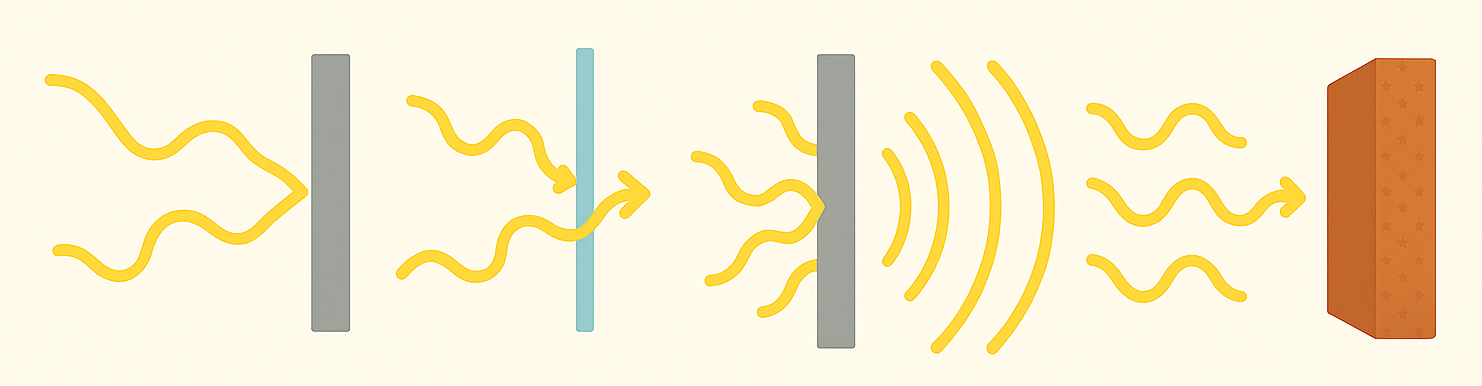

## Room Acoustics

Room acoustics explores how the physical characteristics of a space influence sound quality. The shape, size, and materials of a room affect how sound waves behave, impacting clarity, warmth, and reverberation.

### Room Size and Shape

The dimensions and geometry of a room determine how sound waves reflect, interact, and form standing waves. Irregular shapes and non-parallel surfaces help minimize unwanted echoes and resonances, while rectangular rooms with parallel walls are prone to standing waves, where certain frequencies are reinforced due to repeated reflections.

*Standing waves* form when sound waves reflect between parallel surfaces and interfere with themselves, creating regions of constructive and destructive interference. This results in certain frequencies being amplified (peaks) and others being diminished (nulls) at specific locations in the room. Standing waves are most pronounced at low frequencies and can cause uneven bass response, making some notes sound much louder or softer depending on where you stand. Treating room modes with bass traps and careful placement of speakers/listeners helps minimize these effects.

*Room modes* are the specific frequencies at which standing waves occur, determined by the room’s dimensions (length, width, height). Each mode corresponds to a resonance frequency where sound energy is reinforced. Modes are categorized as axial (between two parallel surfaces), tangential (between four surfaces), and oblique (between six surfaces). Calculating room modes helps identify problematic frequencies and guides acoustic treatment to achieve a balanced sound environment.

```{exercise}
:label: Room Modes
Try a [Room Mode Calculator](https://amcoustics.com/tools/amroc?l=300&w=500&h=300&r60=0.6) to estimate the acoustic properties of a room.
```

Some you may have experienced a particular acoustic phenomenon called *flutter echo*. This is the rapid, repetitive echoes that occur between hard, parallel surfaces (such as bare walls or ceilings). When a sound wave bounces back and forth between these surfaces, it creates a series of closely spaced echoes that can sound like a "ping-pong" effect or a metallic ringing. Flutter echo is especially noticeable in empty rooms or corridors and can degrade speech intelligibility and musical clarity. Acoustic panels or diffusers are often used to break up parallel surfaces and eliminate flutter echo.

In Oslo, we have an acoustic installation at one of the entrances of the National Theatre train station based on a spectacular flutter echo.

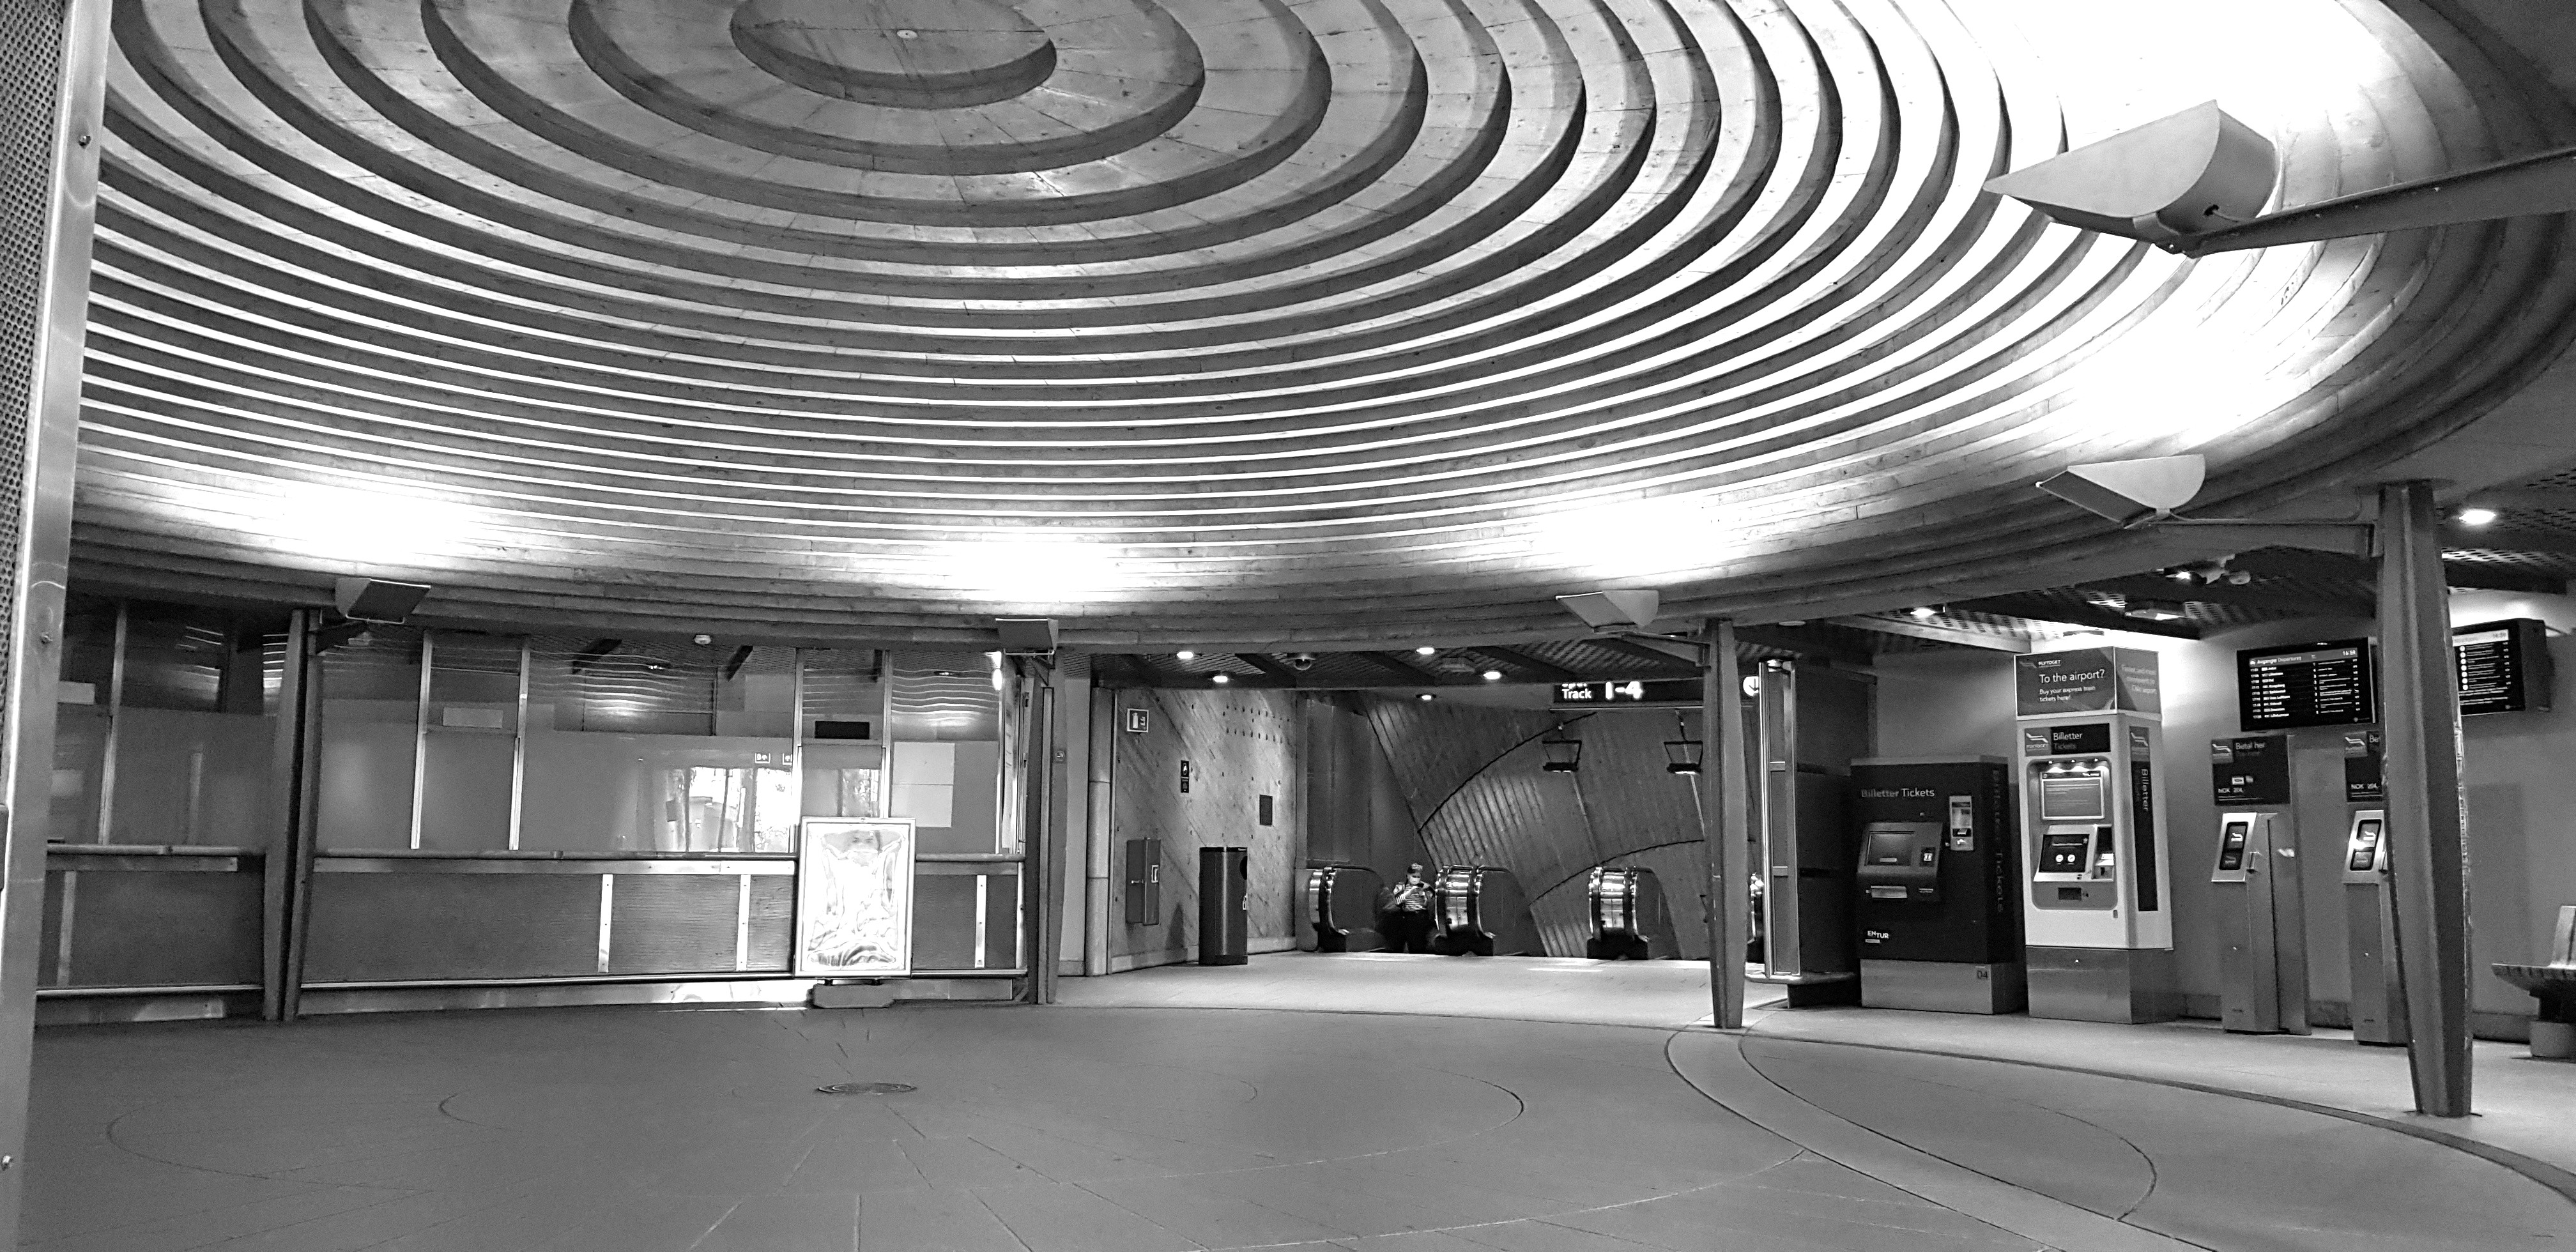

### Materials

Different construction materials play a crucial role in shaping the acoustic properties of a room:

- **Hard surfaces (glass, concrete, tile)**: Reflect sound waves efficiently, leading to increased reverberation and potential echoes. These surfaces can make a space sound "live" or "bright," but may also cause unwanted reflections and clarity issues.
- **Soft materials (carpet, curtains, upholstered furniture, acoustic panels)**: Absorb sound energy, especially at mid and high frequencies, reducing reverberation and minimizing echoes. These materials help create a "dry" or "warm" acoustic environment, improving speech intelligibility and musical detail.
- **Porous materials (foam, mineral wool, fiberglass)**: Highly effective at absorbing sound, particularly at higher frequencies. Used in acoustic panels and bass traps to control reflections and room modes.
- **Dense materials (brick, stone, thick wood)**: Reflect low-frequency sound waves and can help contain sound within a space, but may also contribute to standing waves and bass buildup.
- **Diffusive surfaces (bookshelves, irregular walls, specialized diffusers)**: Scatter sound waves in multiple directions, breaking up strong reflections and preventing flutter echoes. Diffusion improves clarity and creates a more balanced listening environment.
- **Windows and doors**: Can transmit sound between rooms, affecting isolation and privacy. Double glazing and solid-core doors help reduce sound transmission.

The combination of these materials determine the overall acoustic character of a room.

### Acoustic Treatment

The shape, size, and construction of a room are difficult to change after it has 

The above Effective acoustic treatment involves a combination of absorption, diffusion, and strategic placement of materials to optimize sound quality in a room:

- **Absorptive Panels**: Typically made from foam, fiberglass, or mineral wool, these panels are mounted on walls or ceilings to absorb mid and high frequencies. They help reduce reflections, reverberation, and flutter echoes, making speech and music clearer.
- **Bass Traps**: Specialized absorbers placed in corners or along walls to target low-frequency energy. Bass traps help control room modes and prevent bass buildup, which can cause uneven sound and "boomy" bass.
- **Diffusers**: Unlike absorbers, diffusers scatter sound waves in multiple directions. They are often made from wood or plastic and have irregular surfaces or patterns. Diffusers break up strong reflections and standing waves, preserving a sense of spaciousness and natural ambience.
- **Ceiling Clouds**: Suspended panels above listening or performance areas absorb sound from above, reducing ceiling reflections and improving overall clarity.
- **Furniture Arrangement**: Placing bookshelves, couches, and other furnishings strategically can help break up sound reflections and add both absorption and diffusion. Soft furniture absorbs sound, while irregular surfaces diffuse it.
- **Door and Window Seals**: Adding seals or heavy curtains to doors and windows improves sound isolation, preventing unwanted noise from entering or leaving the room.
- **Acoustic Curtains and Rugs**: Thick curtains and rugs add absorption, especially in spaces with many hard surfaces, helping to tame excessive reverberation.

A balanced approach using both absorption and diffusion creates a room that is neither too "dead" nor too "live," supporting accurate sound reproduction and comfortable listening.

```{exercise}
:label: Improving room acoustics

Think about the acoustics of the room you are in. What are the key defining properties of the room? How can you improve it?
```

### Reverberation

*[Reverberation](https://en.wikipedia.org/wiki/Reverberation)* is one of the most defining acoustic properties of a room. It can be defined as the persistence of sound in a space after the original sound source has stopped, caused by reflections from surfaces such as walls, ceilings, and floors.

Acousticians often calculate reverberation time based on the concept *T60*, which is defined as the time it takes for sound to decay by 60 dB after the source stops. The optimal reverberation time depends on the room’s purpose and the type of music or activity. Spaces designed for speech, such as lecture halls, benefit from shorter reverberation times, while concert halls for symphonic music often require longer reverberation for a fuller sound.

- **Short T60 (0.5–1 s)**: Ideal for speech and clarity, minimizing echoes and enhancing intelligibility.
- **Moderate T60 (1.5–2 s)**: Suitable for chamber music, balancing clarity and warmth.
- **Long T60 (2–3 s)**: Preferred for orchestral and choral music, creating a rich and immersive sound.

Understanding and controlling reverberation is essential for creating spaces with desirable acoustic properties, whether for recording studios, concert halls, or home listening rooms. Proper acoustic design ensures clarity, warmth, and an enjoyable listening experience.

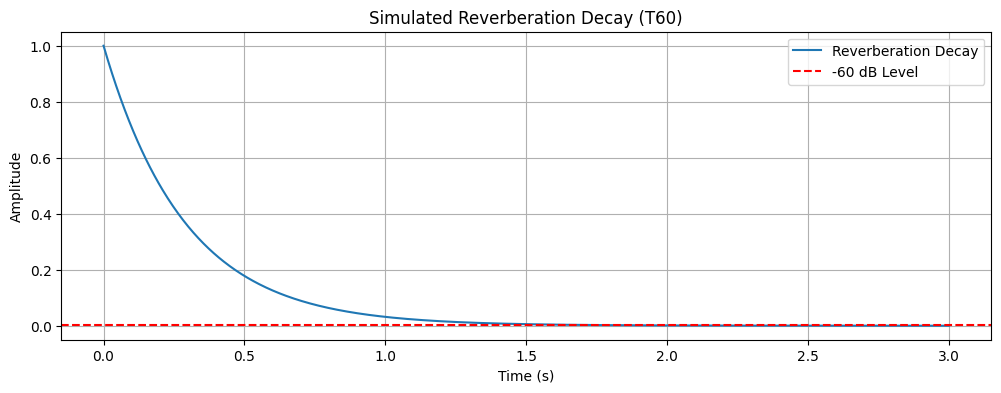

In [21]:
# Simulate a simple exponential decay to illustrate T60 reverberation time
initial_amplitude = 1.0
t = np.linspace(0, 3, 1000)  # 3 seconds duration

# T60 is the time for amplitude to decay by 60 dB (factor of 1/1000)
T60 = 2.0  # seconds (example value)
decay_curve = initial_amplitude * np.exp(-t * np.log(1000) / T60)

plt.figure(figsize=(12, 4))
plt.plot(t, decay_curve, label='Reverberation Decay')
plt.axhline(initial_amplitude / 1000, color='red', linestyle='--', label='-60 dB Level')
plt.title('Simulated Reverberation Decay (T60)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Instrument acoustics

Room acoustics is a big field of study and there are numerous jobs for people working with both constructing and modifying rooms in buildings. There are much fewer people focusing on instrument acoustics. While the scale is smaller, most of the same principles apply to instruments, investigating how musical instruments generate, shape, and radiate sound.

### Principles of instrument acoustics

The main physical principles of instrument acoustics include the *vibration source* and the instrument's *resonance* The initial sound is produced by vibrating elements such as strings (guitar, violin), air columns (flute, trumpet), membranes (drum), or solid bodies (xylophone). Most instruments have resonating bodies (soundboards, tubes, shells) that amplify and color the sound. The shape, size, and material of these bodies determine the instrument’s timbre and loudness.

The vibration source heavily influences the *frequency range* of the instrument. Each instrument has a characteristic range of frequencies it can produce, determined by its physical dimensions and construction.

![Fundamentals of Instrument Acoustics](http://www.sebastianmerchel.de/Projects/Tactile%20Touchscreen/Pictures/fundamentels_instruments_big.jpg)

*Figure: Fundamentals of Instrument Acoustics ([Credit: Sebastian Merchel](http://www.sebastianmerchel.de/)).*

The resonance in the instrument is important for its *timbre* based on its partials and overtones. Instruments rarely produce pure tones; instead, they generate complex waves with multiple harmonics. The relative strength of these harmonics defines the instrument’s unique sound.

An instrument's *radiation pattern* is based on the way sound is projected into the surrounding space depends on the instrument’s geometry and playing technique.

:::: {grid} 1 1 2 3
::: {card}
:header: String instruments

When a string is plucked or bowed, it vibrates at its fundamental frequency and produces harmonics. The body of the instrument (such as a guitar or violin) amplifies these vibrations and shapes the sound. The material and construction of the body affect the instrument’s tone and projection.
:::

::: {card}
:header: Wind instruments

Wind instruments produce sound by vibrating air columns. The length, shape, and material of the tube determine the pitch and timbre. Opening and closing holes changes the effective length of the air column, allowing different notes to be played.
:::

::: {card}
:header: Percussion instruments

Percussion instruments generate sound through striking, shaking, or scraping. The vibration of membranes (drums) or solid bodies (bells, xylophones) creates complex waveforms. The size, tension, and material of the vibrating surface influence the pitch and timbre.
:::
::::


### Organology

In addition to acousticians, there is an academic field focused on the study of musical instruments: *[organology](https://en.wikipedia.org/wiki/Organology)*. This was developed by (ethno)musicologists and researchers working in instrument museums in the late 19th and early 20th century, based on the need to organize large collections of instruments. 

The most famous organological system is the [Hornbostel–Sachs System](https://en.wikipedia.org/wiki/Hornbostel%E2%80%93Sachs), which classifies instruments based on how they produce sound. The main categories are:

- **Idiophones**: Instruments that produce sound primarily by the vibration of their own material, without strings, membranes, or external air columns. Examples include xylophones, cymbals, and bells.
- **Membranophones**: Instruments that produce sound by vibrating a stretched membrane. Drums are the most common example, where the membrane is struck, rubbed, or otherwise excited.
- **Chordophones**: Instruments that produce sound by vibrating strings stretched between fixed points. This group includes violins, guitars, harps, and pianos.
- **Aerophones**: Instruments that produce sound by vibrating columns of air. Examples are flutes, trumpets, saxophones, and pipe organs.
- **Electrophones**: Instruments that produce sound primarily through electrical means. This includes synthesizers, electric guitars (when amplified), and theremins.

Each category can be further subdivided based on how the sound is initiated (struck, plucked, bowed, blown, etc.), the construction of the instrument, and its acoustic properties. Although not entirely similar,  Disney made an interesting animation film called *Toot Whistle Plunk and Boom* in 1953 that shows differences between instruments: 

<iframe width="560" height="315" src="https://www.youtube.com/embed/8iVf0pPHvjc?si=Q7N2xX4m8J1x2ZEL" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Electro-Acoustics

Electro-Acoustics" refers to the field of study and technology that deals with the conversion between electrical signals and sound waves. It encompasses the design, analysis, and application of devices that perform this conversion, such as microphones, loudspeakers, headphones, and hearing aids. This field combines principles from acoustics (the science of sound) and electronics to create systems that enable sound recording, reproduction, and transmission.

### Microphones

Microphones are devices that convert sound waves into electrical signals. They are categorized by their design and working principles. The three main types are: 

- **[Dynamic microphones](https://en.wikipedia.org/wiki/Microphone#Dynamic)** use a diaphragm attached to a coil of wire, which is placed within a magnetic field. When sound waves hit the diaphragm, it moves the coil, generating an electrical signal through electromagnetic induction. These microphones are known for their durability and ability to handle high sound pressure levels, making them ideal for live performances and situations where robustness is required.

- **[Condenser microphones](https://en.wikipedia.org/wiki/Microphone#Condenser)** operate using a diaphragm positioned close to a charged backplate, together forming a capacitor. Sound waves cause the diaphragm to move, changing the distance between the diaphragm and backplate, which alters the capacitance and produces an electrical signal. This design makes condenser microphones highly sensitive and capable of capturing subtle details, making them well-suited for studio recordings and applications requiring high fidelity.

- **[Contact microphones](https://en.wikipedia.org/wiki/Contact_microphone)** detect vibrations directly from solid surfaces rather than from the air. They often use piezoelectric materials to convert these vibrations into electrical signals. This type of microphone is commonly used for amplifying acoustic instruments such as violins or guitars, as it can pick up the vibrations from the instrument’s body, providing a unique perspective on the sound.

In her exploreation of microphones as instruments, Cathy van Eck calls microphones for "softhearers" as a parallel to loudspeakers.

### Loudspeakers

Loudspeakers (or perhaps only speakers) are devices that convert electrical signals into sound waves. They come in various types based on their application and design:

- **Standard Speakers** are used in audio systems for general sound reproduction. They employ a diaphragm (cone) driven by an electromagnet to produce sound and are designed to cover a wide range of frequencies, making them suitable for most listening environments.

- **Headphones** are miniature speakers worn on, around, or in the ears. All headphones feature passive noise cancelling by design (since they cover the ears), but there are also different types of active noise cancelling.

- **Actuators** are devices that create vibrations, typically in solid objects. The vibrations are typically not audible by itself, it is the resonances in the objects excited by the actuator that produces the sound. They are used in haptic feedback systems or to turn surfaces, such as tables or windows, into speakers. They are also used in [bone-conducting headsets](https://en.wikipedia.org/wiki/Bone_conduction). 

```{note}
Did you know that [active noise cancelling](https://en.wikipedia.org/wiki/Active_noise_control) is based on inverting the phase of the sound signal? 

![Noise cancelling](https://upload.wikimedia.org/wikipedia/commons/7/7d/Active_Noise_Reduction.svg)
```


### Signal processing

Signal processing is the field concerned with analyzing, modifying, and synthesizing signals such as sound, images, and scientific measurements. In acoustics and audio engineering, signal processing is essential for improving sound quality, extracting information, and adapting audio for specific applications.

Signal processing can be done in both the analog and digital domain. Key aspects of signal processing in audio include:

- **Amplification**: Increasing the strength of electrical signals so they can drive loudspeakers or be recorded at usable levels.
- **Filtering**: Removing unwanted frequencies (such as noise or hum) or enhancing desired frequency ranges. Filters can be low-pass, high-pass, band-pass, or notch filters, each serving different purposes.
- **Equalization (EQ)**: Adjusting the balance between frequency components to shape the tonal quality of audio signals.
- **Dynamic Range Compression**: Reducing the difference between the loudest and quietest parts of a signal to make audio more consistent and prevent distortion.
- **Noise Reduction**: Techniques such as gating, spectral subtraction, or adaptive filtering to minimize background noise.
- **Effects Processing**: Adding reverberation, delay, chorus, distortion, or other effects to enhance or creatively alter the sound.
- **Modulation**: Changing aspects of the signal such as amplitude, frequency, or phase for transmission or synthesis.

Signal processing is used in microphones, mixing consoles, audio interfaces, hearing aids, mobile devices, and music production software. It enables clear communication, high-fidelity music reproduction, and creative sound design. In the following, we will briefly look into digital sound.


## Digital audio

Digital audio is a huge field, so here we will only be able to scratch the surface. 

### Sound vs audio 

It is important to understand the difference between *sound* and *audio*. Sound refers to vibrations traveling through materials, while audio is the technology or electrical representation used to capture, store, and reproduce those vibrations. Audio can exist in both analog and digital forms, such as LPs, cassettes, or digital files, and serves as the intermediary between devices like microphones and speakers. The distinction is similar to that between light (a physical phenomenon) and video (its recorded representation).

### Digitization

*Digitization* is the process of converting physical sound to digital audio signals using an [Analog-to-Digital Converter](https://en.wikipedia.org/wiki/Analog-to-digital_converter) (ADC). This involves two main steps: *sampling* and *quantization*.

First, the continuous sound wave is measured at regular intervals (samples per second), known as the *sampling rate* (SR). Next, each sampled value is rounded to the nearest value that can be represented by a fixed number of bits (the *bit depth*). Higher bit depths allow for more precise representation of amplitude, resulting in higher audio quality and lower quantization noise. The result is a stream of numbers that can be stored, processed, and transmitted by computers and digital devices. 

Below is a visualization of how a continuous sound wave (such as a sine wave or white noise) is sampled and quantized. The blue curve represents the original continuous wave. The red dots show the sampled points at a specific sampling rate. Quantization further rounds these sampled values to discrete levels, determined by the bit depth.

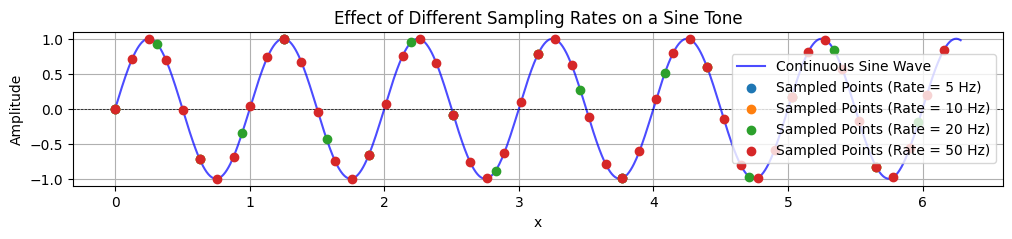

In [23]:
# Define parameters for the sine wave
frequency = 1  # Frequency in Hz
amplitude = 1  # Amplitude of the sine wave
sampling_rates = [5, 10, 20, 50]  # Different sampling rates in Hz

# Generate the continuous sine wave
continuous_wave = amplitude * np.sin(2 * np.pi * frequency * x)

# Create the figure
plt.figure(figsize=(12, 2))

# Plot the continuous sine wave
plt.plot(x, continuous_wave, label='Continuous Sine Wave', color='blue', alpha=0.7)

# Plot sampled points for each sampling rate
for i, rate in enumerate(sampling_rates):
    sampled_x = np.linspace(0, 2 * np.pi, rate, endpoint=False)
    sampled_wave = amplitude * np.sin(2 * np.pi * frequency * sampled_x)
    plt.scatter(sampled_x, sampled_wave, label=f'Sampled Points (Rate = {rate} Hz)', zorder=5)

plt.title('Effect of Different Sampling Rates on a Sine Tone')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Sampling rate

The sampling rate is the number of samples per second taken from a continuous signal to create a discrete signal. According to the [Nyquist–Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem), the sampling rate must be at least twice the highest frequency present in the signal to accurately reconstruct it. This minimum rate is known as the [Nyquist Frequency](https://en.wikipedia.org/wiki/Nyquist_frequency). When the CD was introduced, it was decided that it should have a sampling rate of 44,100 Hz, which can capture frequencies up to 22,050 Hz. As we shall see next week, this is sufficient to cover all humanly audible sounds.

Nowadays, it is often common to have much higher sampling rates, such as 96 kHz and 192 kHz. This is far beyond human hearing, but there are several benefits in audio processing:

- **Extended Frequency Response**: While humans cannot hear frequencies above ~20 kHz, higher sampling rates allow for accurate recording and reproduction of ultrasonic content, which can affect the audible range through nonlinear processing or analog equipment.
- **Reduced Aliasing**: Aliasing is distortion caused when high-frequency signals are misrepresented as lower frequencies. Higher sampling rates push the aliasing artifacts further above the audible range, making them easier to filter out.
- **Improved Phase Accuracy**: Digital filters and processing algorithms can operate with greater precision at higher sampling rates, resulting in more accurate phase response and less pre-ringing or artifacts.
- **Better Headroom for Processing**: Audio editing, mixing, and effects (such as pitch shifting or time stretching) can be performed with fewer artifacts and greater fidelity at higher sampling rates.
- **Archival and Mastering Quality**: Recording at higher rates preserves more information for future remastering or conversion to other formats, ensuring the highest possible quality.

However, higher sampling rates also result in larger file sizes and increased CPU usage, so they are typically used in professional recording, mixing, and mastering environments rather than for consumer playback.



### Bit depth

The [audio bit depth](https://en.wikipedia.org/wiki/Audio_bit_depth) is the amount of data used to represent each individual sample in a digital audio signal. Bit depth determines the "resolution" or precision of the amplitude values that can be stored. Higher bit depths allow for more accurate representation of the original sound, resulting in lower quantization noise and a greater dynamic range.

- **Low bit depth (e.g., 8-bit)**: Only a small number of amplitude levels are available, which can introduce audible distortion and noise, especially in quiet passages.
- **Medium bit depth (e.g., 16-bit)**: CD-quality audio uses 16 bits per sample, allowing for 65,536 possible amplitude values. 
- **High bit depth (e.g., 24-bit)**: Professional audio recordings nowadays often use 24 bits per sample, providing over 16 million possible values and a wider dynamic range. Many more amplitude levels are available, resulting in smoother, more natural sound and the ability to capture subtle details.

Quite recently, there are 32-bit recorders available, offering an extremely high dynamic range, far beyond what human hearing or traditional analog equipment can capture. With 32-bit float, you can record both very quiet and extremely loud sounds without worrying about clipping (distortion from signals being too loud) or noise floor issues (signals being too quiet). This means you can adjust levels after recording without losing audio quality, making it nearly impossible to ruin a recording due to incorrect gain settings. While most playback systems and final mixes use 24-bit or 16-bit audio, 32-bit float is a powerful tool for capturing and processing audio with maximum flexibility and safety during production.

The effect of bit depth can be visualized by quantizing a waveform at different bit depths. Lower bit depths produce a "stepped" appearance and more distortion, while higher bit depths closely follow the original waveform.

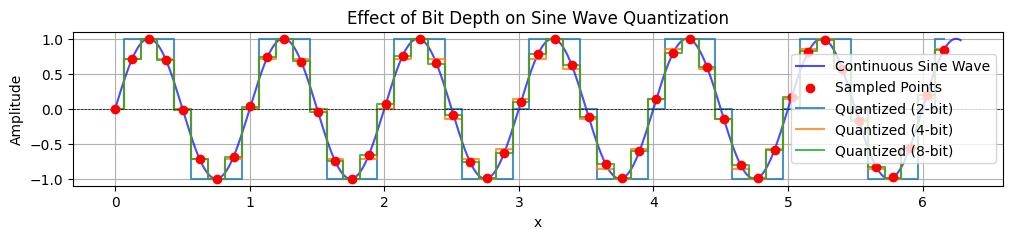

In [24]:
# Define parameters for the sine wave
frequency = 1  # Frequency in Hz
amplitude = 1  # Amplitude of the sine wave
sampling_rate = 50  # Sampling rate in Hz (samples per second)

# Generate the continuous sine wave
continuous_wave = amplitude * np.sin(2 * np.pi * frequency * x)

# Generate the sampled points
sampled_x = np.linspace(0, 2 * np.pi, sampling_rate, endpoint=False)
sampled_wave = amplitude * np.sin(2 * np.pi * frequency * sampled_x)

# Quantize the sampled wave at different bit depths
bit_depths = [2, 4, 8]  # Bit depths to demonstrate
quantized_waves = [np.round(sampled_wave * (2**(b-1) - 1)) / (2**(b-1) - 1) for b in bit_depths]

# Plot the continuous wave, sampled points, and quantized waves
plt.figure(figsize=(12, 2))

# Plot the continuous sine wave
plt.plot(x, continuous_wave, label='Continuous Sine Wave', color='blue', alpha=0.7)

# Plot the sampled points
plt.scatter(sampled_x, sampled_wave, color='red', label='Sampled Points', zorder=5)

# Plot quantized waves
for i, b in enumerate(bit_depths):
    plt.step(sampled_x, quantized_waves[i], where='mid', label=f'Quantized ({b}-bit)', alpha=0.8)

plt.title('Effect of Bit Depth on Sine Wave Quantization')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Audio Compression and File Formats

The final topic in today's class is audio file formats and compression, essential for storing, sharing, and streaming digital sound.

Audio *containers* are file formats that store digital audio data along with metadata (such as track info, album art, and artist details). Common containers include [WAV](https://en.wikipedia.org/wiki/WAV) (Windows) and [AIFF](https://en.wikipedia.org/wiki/Audio_Interchange_File_Format) (Apple), which both offer uncompressed, high-quality audio. 

Several container types, e.g. [MKV](https://en.wikipedia.org/wiki/Matroska), can contain raw (uncompressed) and/or compressed audio data alongside video and metadata. Others, like [MP4](https://en.wikipedia.org/wiki/MPEG-4_Part_14), store compressed audio, often in combination with video.

It is important to note that the container used for storing the file is (often) independent from the audio *compression* used. Note that audio file compression is not the same as the dynamics compression often used to improve the balance in recordings. Audio file compression is based on reducing the file size of digital audio, making it easier to store and transmit. There are two main types:

- **Lossless compression**: Preserves all original audio data, allowing perfect reconstruction, such as [FLAC](https://en.wikipedia.org/wiki/FLAC) and [ALAC](https://en.wikipedia.org/wiki/Apple_Lossless). 
- **Lossy compression**: Removes some audio data, typically those less perceptible to human hearing, to achieve smaller file sizes, such as [MP3](https://en.wikipedia.org/wiki/MP3) and [AAC](https://en.wikipedia.org/wiki/Advanced_Audio_Coding). Here is a quick overview of what to use: 

| Format | Compression Type | Typical Use | Quality |
|--------|------------------|-------------|---------|
| WAV, AIFF    | None             | Recording, editing | Excellent |
| FLAC   | Lossless         | Archiving, hi-fi   | Excellent |
| AAC    | Lossy            | Streaming | Good |

While MP3 files can provide good quality, AAC compression generally produces smaller file size and are therefore preferred. For those concerned about using open formats, such as the [Ogg container](https://en.wikipedia.org/wiki/Ogg) and related compression formats. 


```{exercise}
:label: Audio compression

Try to store an uncompressed audio file in a highly compressed format (MP3 or AAC). Listen to how it degrades.
```

## Questions

1. What is the difference between longitudinal and transverse waves, and how do these wave types relate to the propagation of sound in different media?

2. Explain the concepts of frequency, amplitude, and phase in sound waves. How do changes in each property affect the perception of sound?

3. Describe the role of room acoustics in shaping sound quality. What are standing waves, room modes, and flutter echo, and how can acoustic treatment improve a room’s acoustics?

4. Compare and contrast the main categories of musical instruments in the Hornbostel–Sachs system. How does each category produce sound, and what are some examples?

5. What is the process of digitizing sound, and how do sampling rate and bit depth influence the quality of digital audio?